# Data analysis: bicincitta_parma - Dashboard
A. Heuillet & F. Couthouis

In [198]:
from datetime import datetime,timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

pd.plotting.register_matplotlib_converters()
plt.style.use('seaborn-dark')
sns.set_context("paper")


datafile = "Data/15. Repubblica/2014-12-08 16:00:00.csv.gz"
df = pd.read_csv(datafile, compression='gzip', sep=';',parse_dates=["Timestamp"])

print(df.describe())
df.head()


Bikes       Slots       Total    Humidity     Pressure  \
count  277.000000  277.000000  277.000000  277.000000   277.000000   
mean     3.057762    6.758123    9.815884   83.043321   979.417617   
std      1.607361    1.923156    0.388280   14.895467    34.448889   
min      2.000000    2.000000    9.000000   50.000000   944.750000   
25%      2.000000    6.000000   10.000000   73.000000   947.140000   
50%      2.000000    8.000000   10.000000   88.000000   955.490000   
75%      4.000000    8.000000   10.000000   95.000000  1018.000000   
max      7.000000    8.000000   10.000000  100.000000  1023.000000   

          WindDeg   WindSpeed  TemperatureTemp  
count  277.000000  277.000000       277.000000  
mean   100.431933    1.218123         3.328303  
std     89.539335    0.648080         4.363748  
min     12.004000    0.520000        -5.120000  
25%     41.005200    0.710000         0.180000  
50%     65.500400    0.870000         2.710000  
75%    106.004000    1.760000         

,Timestamp,Station,Bikes,Slots,Total,Status,Humidity,Pressure,Rain,WindDeg,WindSpeed,Snow,TemperatureTemp
0,2014-12-08 16:00:00,15. Repubblica,2,8,10,clouds,92.0,948.0,{},106.004,0.71,{},5.77
1,2014-12-08 16:10:00,15. Repubblica,2,8,10,clouds,92.0,948.0,{},106.004,0.71,{},5.77
2,2014-12-08 16:20:00,15. Repubblica,2,8,10,clouds,92.0,948.0,{},106.004,0.71,{},5.77
3,2014-12-08 16:30:00,15. Repubblica,2,8,10,clouds,92.0,948.0,{},106.004,0.71,{},5.77
4,2014-12-08 16:40:00,15. Repubblica,2,8,10,clouds,92.0,948.0,{},106.004,0.71,{},5.77


In [205]:
#Select only one day

#Timestamp of the first row of the day (atr midnight)
start_date = df[df['Timestamp'].apply(lambda x :x.hour == 0)]['Timestamp'].iloc[0] 
end_date = start_date + timedelta(days=1)
mask = (df['Timestamp'] >= start_date) & (df['Timestamp'] < end_date)

df_one_day = df.loc[mask]

date_str = start_date.strftime('%A %d %B %Y')
stat_name = df['Station'].iloc[0][4:]
print(f"Dashboard for station {stat_name} on {date_str}" )


Dashboard for station Repubblica on Tuesday 09 December 2014


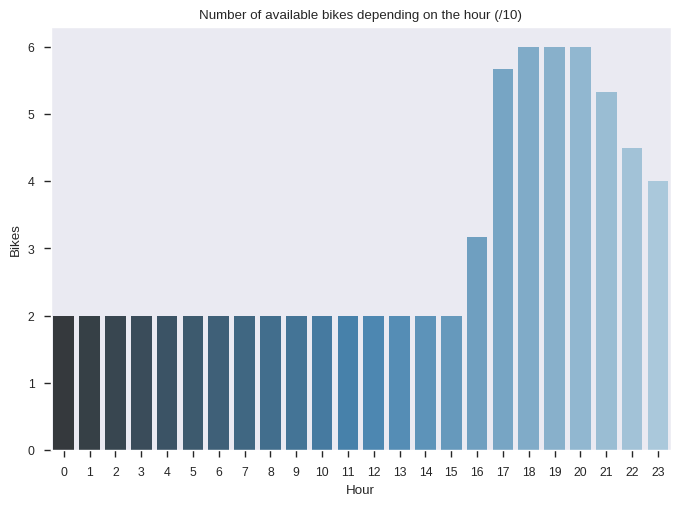

In [209]:
df_one_day.index = df_one_day['Timestamp']
df_one_day = df_one_day.resample('H').mean().reset_index()
df_one_day["Hour"] = df_one_day["Timestamp"].apply(lambda x: x.hour)


def draw_plot(x, y,title=""):
    ax = sns.lineplot(x,y)
    ax.set_title(title)
    
def draw_barplot(x,y,title=""):
    ax = sns.barplot(x,y, palette="Blues_d")
    ax.set_title(title)

max_bikes = df_one_day["Total"].iloc[0].astype(int)
draw_barplot(df_one_day["Hour"], df_p["Bikes"], title=f"Number of available bikes depending on the hour (/{max_bikes})")


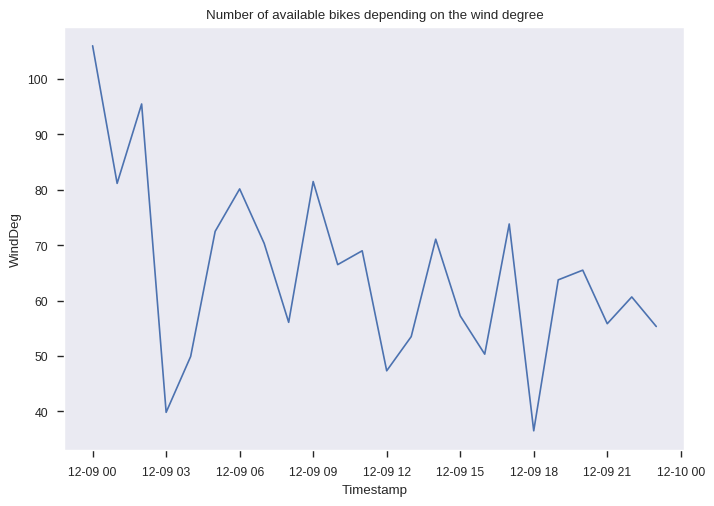

In [212]:
draw_plot(df_one_day["Timestamp"], df_p["WindDeg"], title="Number of available bikes depending on the wind degree")


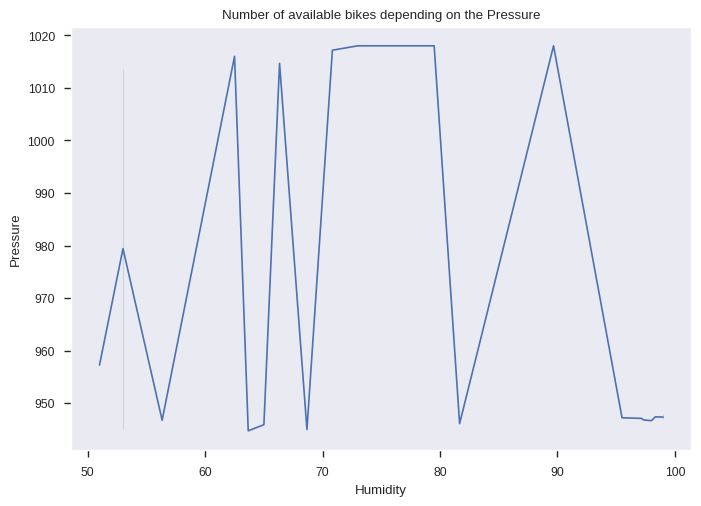

In [220]:
draw_plot(df_one_day["Humidity"], df_p["Pressure"], title="Number of available bikes depending on the Pressure")


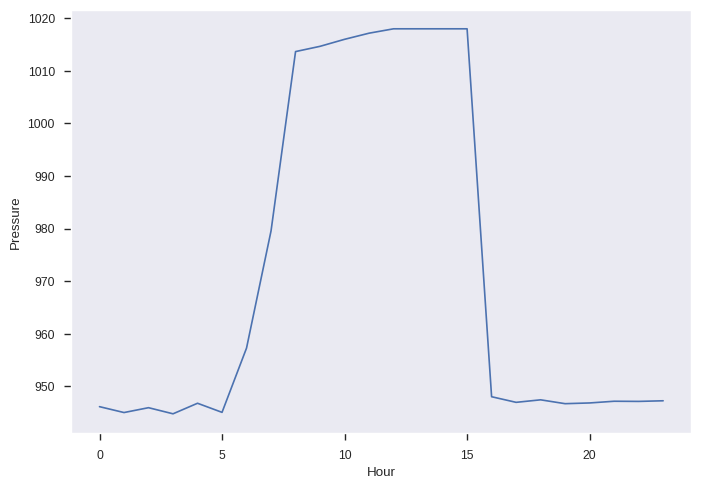

In [169]:
draw_plot(df_one_day["Timestamp"], df_p["Pressure"])


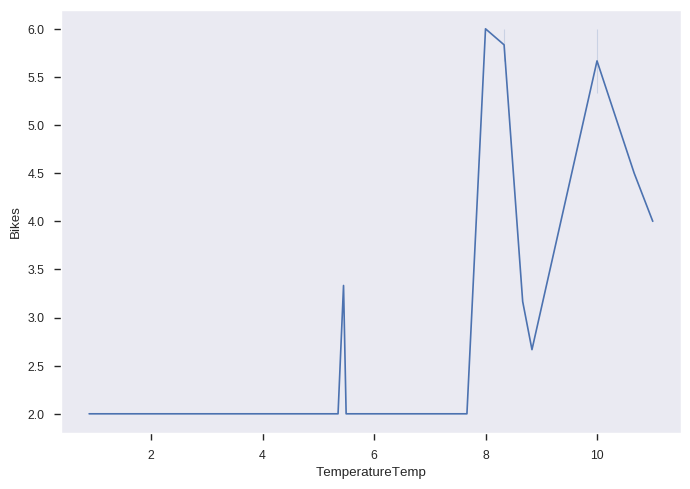

In [219]:
draw_plot(df_one_day["TemperatureTemp"],df_one_day["Bikes"])
